In [13]:
import logging
logging.basicConfig(level=logging.WARNING)
#logging.basicConfig(level=logging.WARNING)


In [1]:
import openai
print(openai.__version__)

1.51.2


In [14]:
from vanna.openai import OpenAI_Chat
from openai import AzureOpenAI
from vanna.vannadb import VannaDB_VectorStore
import openai
# Define the OpenAI client configuration
openai_client_config = {
    "api_key": "sk-dSTROKbqfoD8L2WDNDhwXA",  # Replace with your actual API key
    "base_url": "http://litellm.toxpipe.niehs.nih.gov"  # LiteLLM Proxy URL
}

# Define the AzureOpenAI client configuration if necessary
azure_openai_config = {
#    "api_type": "azure",
    "api_base": "http://litellm.toxpipe.niehs.nih.gov",
    "api_version": "2023-03-15-preview",
    "api_key": "sk-dSTROKbqfoD8L2WDNDhwXA"  # Replace with your Azure API key
}
class MyVanna(VannaDB_VectorStore, OpenAI_Chat):
    def __init__(self, config=None):
        MY_VANNA_MODEL = 'dtt_gpt35'
        MY_VANNA_API_KEY = '317864f791404e428e7775b8c71526ae'
        # Initialize VannaDB_VectorStore
        VannaDB_VectorStore.__init__(self, vanna_model=MY_VANNA_MODEL, vanna_api_key=MY_VANNA_API_KEY, config=config)
        # Initialize OpenAI_Chat with AzureOpenAI
        azure_client = AzureOpenAI(
#            api_type=azure_openai_config["api_type"],
            azure_endpoint=azure_openai_config["api_base"],
            api_version=azure_openai_config["api_version"],
            api_key=azure_openai_config["api_key"]
        )
        OpenAI_Chat.__init__(self, client=azure_client, config=config)
# Instantiate MyVanna
vn = MyVanna(config={'model': 'azure-gpt-4o'})

In [15]:
import sys
sys.path.append('./python_modules')

import importlib
import init

print(f"engin:{init.engin}")

engin:azure-gpt-4o


In [16]:
#vn.connect_to_postgres(host='ehsdtt031535.niehs.nih.gov', dbname='test', user='dtt_user', password='dtt_user123!', port='5432')
vn.connect_to_sqlite('./data/vanna_zebrafish/OECD_ZF_LDTT.sqlite')


In [17]:
# The information schema query may need some tweaking depending on your database. This is a good starting point.
#df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")
df_information_schema = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")
df_ddl = df_information_schema
# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
for ddl in df_ddl['sql'].to_list():
    vn.train(ddl=ddl)
    
#plan = vn.get_training_plan_generic(df_information_schema)
#plan


Adding ddl: CREATE TABLE sources (
  -- source_id INTEGER PRIMARY KEY,
  source_name VARCHAR,
  source_code VARCHAR PRIMARY KEY
)
Adding ddl: CREATE INDEX `sources_source_code` ON `sources` (`source_code`)
Adding ddl: CREATE TABLE sqlite_stat1(tbl,idx,stat)
Adding ddl: CREATE TABLE sqlite_stat4(tbl,idx,neq,nlt,ndlt,sample)
Adding ddl: CREATE TABLE chemicals (
  chemical_id INTEGER PRIMARY KEY,
  chemical_code VARCHAR,
  dtxsid VARCHAR,
  casrn VARCHAR,
  preferred_name VARCHAR
)
Adding ddl: CREATE INDEX `chemicals_chemical_id` ON `chemicals` (`chemical_id`)
Adding ddl: CREATE TABLE well_types (
  -- well_type_id INTEGER PRIMARY KEY,
  well_type VARCHAR PRIMARY KEY,
  well_description VARCHAR
)
Adding ddl: CREATE INDEX `well_types_well_type` ON `well_types` (`well_type`)
Adding ddl: CREATE TABLE plates (
  plate_id INTEGER PRIMARY KEY,
  plate_name VARCHAR,
  source_code VARCHAR,
  plate_screen_time TIMESTAMP,
  plate_stage VARCHAR,
  FOREIGN KEY (source_code) REFERENCES sources(source_

In [18]:
# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="It is a SQLite zebrafish database and consists of multiple tables with their respective fields and relationships")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.


Adding documentation....


'2799310-doc'

In [19]:
vn.train(sql="select count(*) from endpoints;")
vn.train(sql="SELECT phase_code, COUNT(*) AS data_count FROM behavior_data GROUP BY phase_code;")

INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Using model azure-gpt-4o for 61.25 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: How many endpoints are there? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Using model azure-gpt-4o for 73.75 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What is the count of records for each phase code? 
Adding SQL...


'c74a89cc97da2c68acb6810f991530a2-sql'

In [20]:
training_data = vn.get_training_data()
#training_data

INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE behavior_data (\n  devtox_data_id INTEGER,\n  phase_code VARCHAR,\n  bin_id INTEGER,\n  distance_moved REAL,\n  time_end INTEGER,\n  FOREIGN KEY (devtox_data_id) REFERENCES devtox_data(devtox_data_id)\n    ON DELETE CASCADE\n    ON UPDATE CASCADE,\n  FOREIGN KEY (phase_code) REFERENCES phases(phase_code)\n    ON DELETE CASCADE\n    ON UPDATE CASCADE,\n  FOREIGN KEY (bin_id) REFERENCES bins(bin_id)\n    ON DELETE CASCADE\n    ON UPDATE CASCADE,\n  PRIMARY KEY (devtox_data_id, phase_code, bin_id)\n)\n\nCREATE TABLE behavior_data (\n  devtox_data_id INTEGER,\n  phase_code VARCHAR,\n  bin_id INTEGER,\n  distance_moved REAL,\n  time_end INTEGER,\n  FOREIGN KEY (devtox_data_id) REFERENCES devtox_data(devtox_data_id)\n    ON 

INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


LLM Response: SELECT COUNT(*) AS total_records
FROM behavior_data
WHERE distance_moved > 1400;
Extracted SQL: SELECT COUNT(*) AS total_records
FROM behavior_data
WHERE distance_moved > 1400;
SELECT COUNT(*) AS total_records
FROM behavior_data
WHERE distance_moved > 1400;
   total_records
0            334


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Using model azure-gpt-4o for 188.5 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


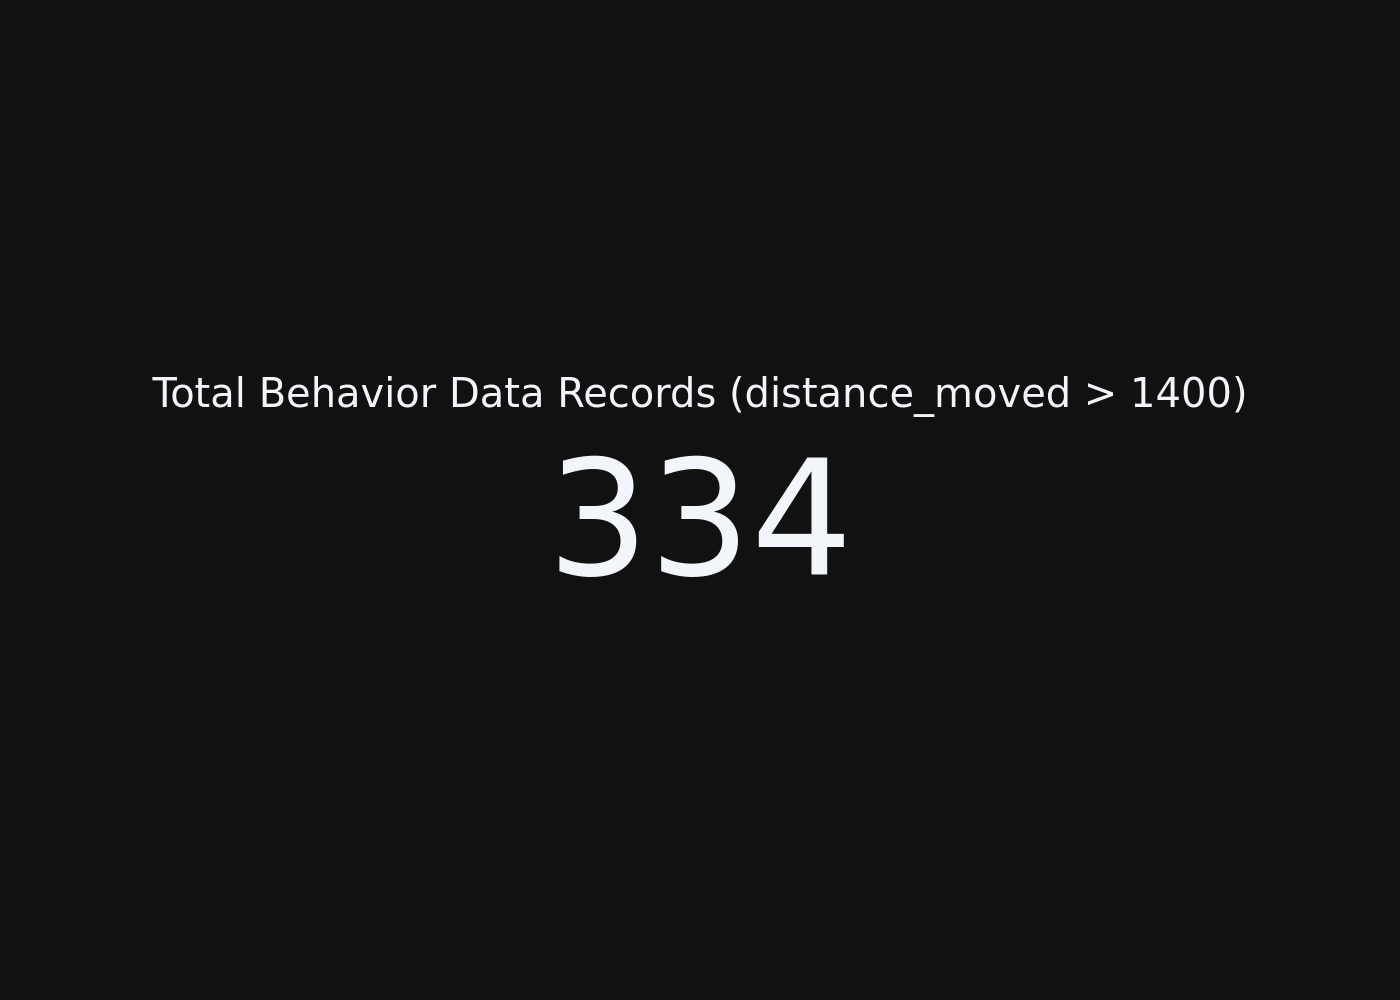

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


In [21]:
vn.ask('How many total behavior data records in the database when distance_moved greater than 1400?')
from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Using model azure-gpt-4o for 1461.0 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


SELECT phase_code, COUNT(*) AS data_count
FROM behavior_data
GROUP BY phase_code;
  phase_code  data_count
0         D0       38400
1         D1      244800
2         D2      629760
3         D3      476352
4         L0       38400
5         L1      244800
6         L2      244800
7         L3      622080


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Using model azure-gpt-4o for 187.75 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


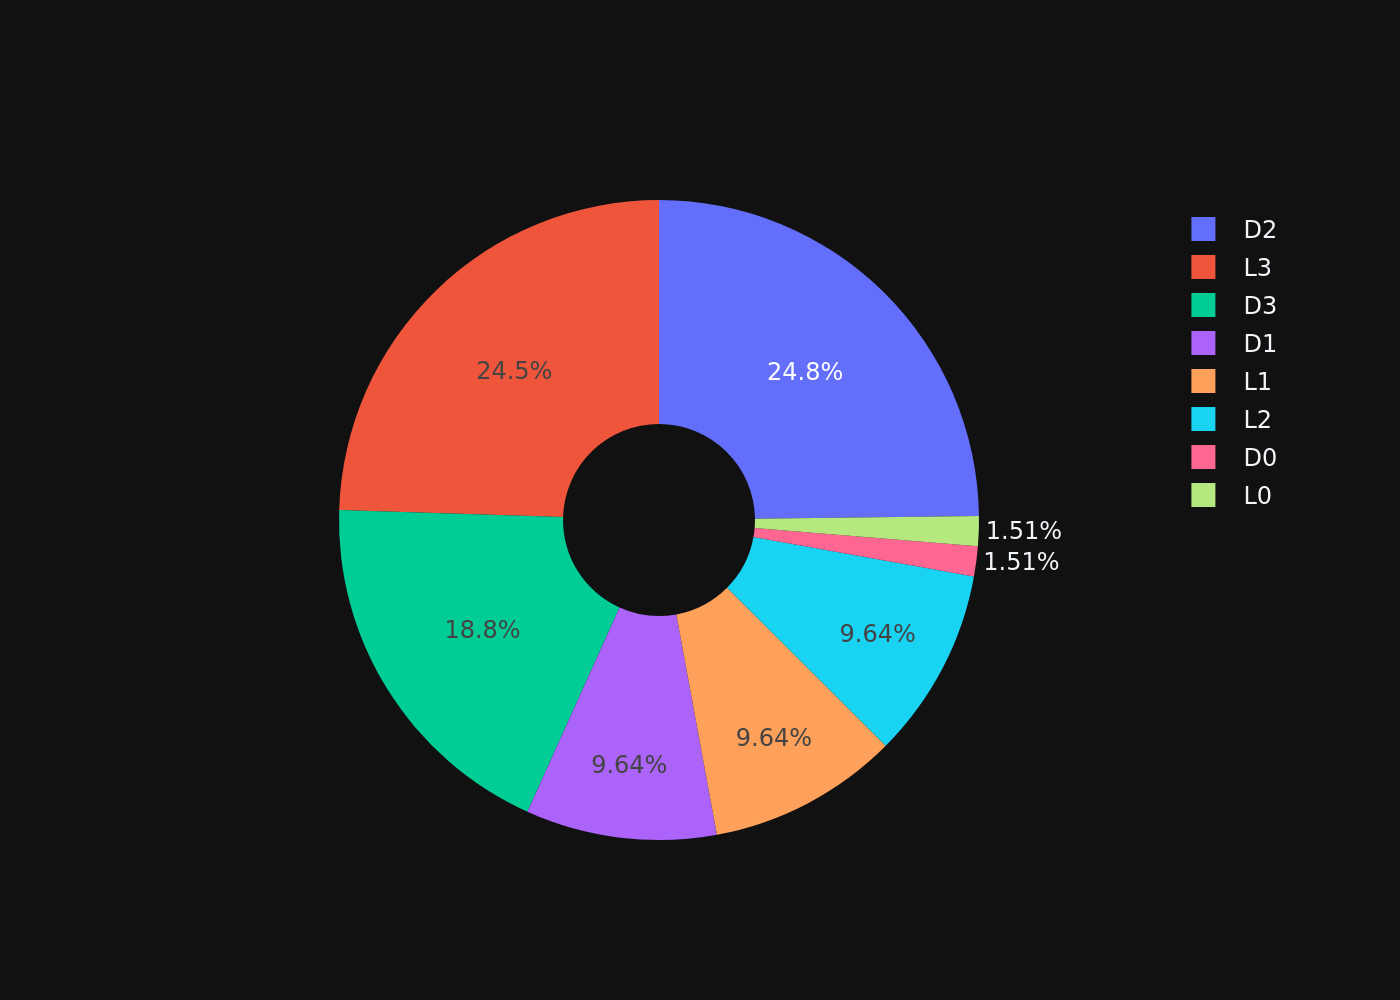

('SELECT phase_code, COUNT(*) AS data_count\nFROM behavior_data\nGROUP BY phase_code;',
   phase_code  data_count
 0         D0       38400
 1         D1      244800
 2         D2      629760
 3         D3      476352
 4         L0       38400
 5         L1      244800
 6         L2      244800
 7         L3      622080,
 Figure({
     'data': [{'hole': 0.3,
               'labels': array(['D0', 'D1', 'D2', 'D3', 'L0', 'L1', 'L2', 'L3'], dtype=object),
               'type': 'pie',
               'values': array([ 38400, 244800, 629760, 476352,  38400, 244800, 244800, 622080])}],
     'layout': {'template': '...'}
 }))

In [23]:
vn.ask("Show me the behavior data  destribution by phase_code in pie chart; ")


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Using model azure-gpt-4o for 1718.75 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


SELECT endpoint_id, endpoint_value
FROM endpoint_data 
JOIN devtox_data ON endpoint_data.devtox_data_id = devtox_data.devtox_data_id
WHERE well_position = 'A1' AND plate_id = 'biobide_vpa1_v2:Plate1-R1';
Empty DataFrame
Columns: [endpoint_id, endpoint_value]
Index: []
Using model azure-gpt-4o for 236.75 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


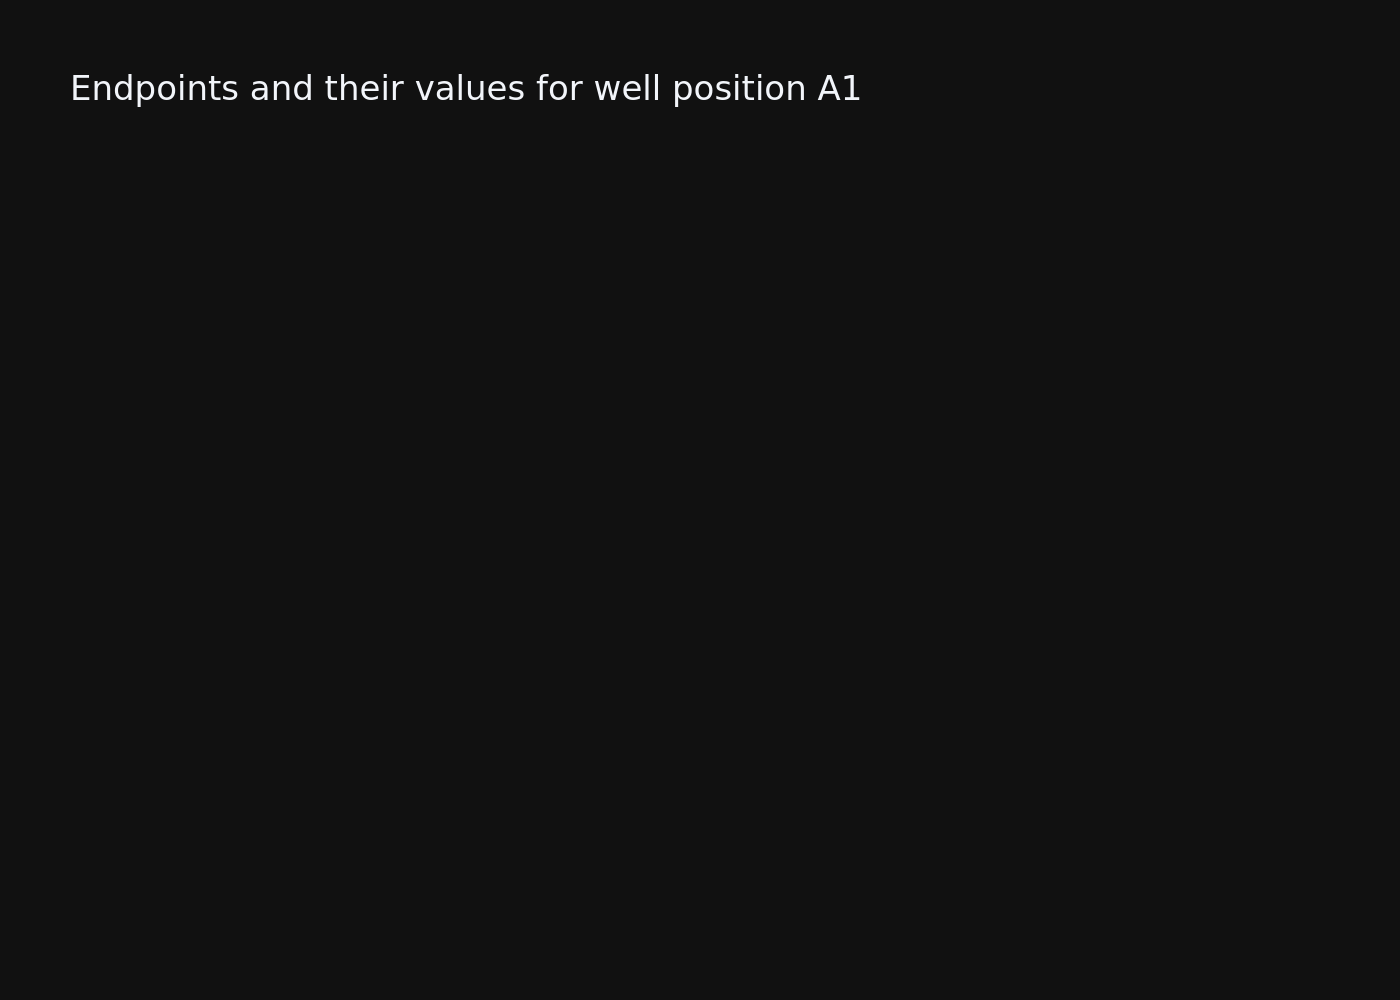

("SELECT endpoint_id, endpoint_value\nFROM endpoint_data \nJOIN devtox_data ON endpoint_data.devtox_data_id = devtox_data.devtox_data_id\nWHERE well_position = 'A1' AND plate_id = 'biobide_vpa1_v2:Plate1-R1';",
 Empty DataFrame
 Columns: [endpoint_id, endpoint_value]
 Index: [],
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'endpoint_id=%{label}<br>endpoint_value=%{value}<extra></extra>',
               'labels': array([], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie',
               'values': array([], dtype=object)}],
     'layout': {'legend': {'tracegroupgap': 0},
                'template': '...',
                'title': {'text': 'Endpoints and their values for well position A1'}}
 }))

In [28]:
vn.ask("What are the endpoints and their values for the well position 'A1' on plate 'biobide_vpa1_v2:Plate1-R1'? make a pie chart by endpoint.")

### End Here 

### load the training data

In [ ]:
file_path="./data_training_OECD"

In [25]:
import json

# Path to your JSON file
file_path = "./data_training_OECD/OECD_ZF_Tran.json"

# Load the JSON file
with open(file_path, 'r') as file:
    train_data = json.load(file)

In [27]:
# Loop through the SQL queries in the "Train" section
for item in train_data.get("Train", []):
    sql_query = item.get("sql")
    if sql_query:
        try:
            # Execute the SQL query using vn.train
            vn.train(sql=sql_query)
            print(f"Successfully executed: {sql_query}")
        except Exception as e:
            print(f"Error executing SQL: {sql_query}\nError: {e}")

INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Using model azure-gpt-4o for 61.25 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: How many chemicals are there? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT COUNT(*) FROM chemicals;
Using model azure-gpt-4o for 69.5 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the IDs, names, and descriptions of the endpoints? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT endpoint_id, endpoint_name, endpoint_desc FROM endpoints;
Using model azure-gpt-4o for 64.25 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the names and stages of the plates? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT plate_name, plate_stage FROM plates;
Using model azure-gpt-4o for 65.75 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: How many distinct well types are there? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT COUNT(DISTINCT well_type) FROM well_types;
Using model azure-gpt-4o for 58.75 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are all the details of the phases? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT * FROM phases;
Using model azure-gpt-4o for 62.25 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: How many records are in the dataset? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT COUNT(*) FROM behavior_data;
Using model azure-gpt-4o for 66.5 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the distinct concentration units in the dataset? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT DISTINCT concentration_unit FROM devtox_data;
Using model azure-gpt-4o for 62.25 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the IDs and ranges of the bins? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT bin_id, bin_range FROM bins;
Using model azure-gpt-4o for 63.5 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the unique source codes? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT DISTINCT source_code FROM plates;
Using model azure-gpt-4o for 62.25 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: How many records are in the dataset? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT COUNT(*) FROM endpoint_data;
Using model azure-gpt-4o for 100.0 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: Which behavior data is associated with the chemical that has the preferred name 'xxx'? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT * FROM behavior_data WHERE devtox_data_id IN (SELECT devtox_data_id FROM devtox_data dev JOIN chemicals che ON dev.chemical_id = che.chemical_id WHERE che.preferred_name = 'xxx');
Using model azure-gpt-4o for 98.0 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: Which behavior data is associated with the chemical having the DTXSID 'xxx'? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT * FROM behavior_data WHERE devtox_data_id IN (SELECT devtox_data_id FROM devtox_data dev JOIN chemicals che ON dev.chemical_id = che.chemical_id WHERE che.dtxsid = 'xxx');
Using model azure-gpt-4o for 83.5 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the plate IDs and names for the source named 'xxx'? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT plate_id, plate_name FROM plates WHERE source_code = (SELECT source_code FROM sources WHERE source_name = 'xxx');
Using model azure-gpt-4o for 97.75 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What endpoint data is associated with the chemical that has the CASRN 'xxx'? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT ed.* FROM endpoint_data ed JOIN devtox_data dev ON ed.devtox_data_id = dev.devtox_data_id JOIN chemicals che ON dev.chemical_id = che.chemical_id WHERE che.casrn = 'xxx';
Using model azure-gpt-4o for 88.25 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: Which bins are associated with the phase code 'xxx'? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT b.* FROM bins b JOIN phase_bins pb ON b.bin_id = pb.bin_id JOIN phases p ON pb.phase_code = p.phase_code WHERE p.phase_code = 'xxx';
Using model azure-gpt-4o for 99.25 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the unique well positions for plates with the source code corresponding to the source name 'xxx'? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT DISTINCT dev.well_position FROM devtox_data dev JOIN plates pl ON dev.plate_id = pl.plate_id WHERE pl.source_code = (SELECT source_code FROM sources WHERE source_name = 'xxx');
Using model azure-gpt-4o for 112.25 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the endpoint names and their corresponding preferred chemical names? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT e.endpoint_name, che.preferred_name FROM endpoint_data ed JOIN devtox_data dev ON ed.devtox_data_id = dev.devtox_data_id JOIN chemicals che ON dev.chemical_id = che.chemical_id JOIN endpoints e ON ed.endpoint_id = e.endpoint_id;
Using model azure-gpt-4o for 109.5 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the phase codes, bin IDs, and bin ranges for the source code associated with the plate named 'xxx'? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT p.phase_code, b.bin_id, b.bin_range FROM phases p JOIN phase_bins pb ON p.phase_code = pb.phase_code JOIN bins b ON pb.bin_id = b.bin_id WHERE p.source_code = (SELECT source_code FROM plates WHERE plate_name = 'xxx');
Using model azure-gpt-4o for 114.0 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the preferred names and concentrations of chemicals used in a specific phase? 
Adding SQL...


INFO:httpx:HTTP Request: POST http://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 308 Permanent Redirect"


Successfully executed: SELECT che.preferred_name, dev.concentration FROM devtox_data dev JOIN chemicals che ON dev.chemical_id = che.chemical_id JOIN plates pl ON dev.plate_id = pl.plate_id JOIN phases p ON pl.source_code = p.source_code WHERE p.phase_code = 'xxx';
Using model azure-gpt-4o for 123.5 tokens (approx)


INFO:httpx:HTTP Request: POST https://litellm.toxpipe.niehs.nih.gov/openai/deployments/azure-gpt-4o/chat/completions?api-version=2023-03-15-preview "HTTP/1.1 200 OK"


Question generated with sql: What are the endpoint names and values for the well position 'A1' on the plate named 'xxx'? 
Adding SQL...
Successfully executed: SELECT e.endpoint_name, ed.endpoint_value FROM endpoint_data ed JOIN devtox_data dev ON ed.devtox_data_id = dev.devtox_data_id JOIN endpoints e ON ed.endpoint_id = e.endpoint_id JOIN plates pl ON dev.plate_id = pl.plate_id WHERE dev.well_position = 'A1' AND pl.plate_name = 'xxx';


In [35]:
#import vanna
from vanna.remote import VannaDefault

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): vanna.ai:443
DEBUG:urllib3.connectionpool:https://vanna.ai:443 "GET /Chinook.sqlite HTTP/11" 200 1067008
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ask.vanna.ai:443
DEBUG:urllib3.connectionpool:https://ask.vanna.ai:443 "POST /rpc HTTP/11" 200 7476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ask.vanna.ai:443


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INT

DEBUG:urllib3.connectionpool:https://ask.vanna.ai:443 "POST /rpc HTTP/11" 200 307
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ask.vanna.ai:443


LLM Response: SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 10;
Extracted SQL: SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 10;
SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 10;
   ArtistId                     Name  TotalSales
0        90              Iron Maiden         140
1       150                       U2         107
2        50                Metallica  

DEBUG:urllib3.connectionpool:https://ask.vanna.ai:443 "POST /rpc HTTP/11" 200 154
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ask.vanna.ai:443
DEBUG:urllib3.connectionpool:https://ask.vanna.ai:443 "POST /rpc HTTP/11" 200 396


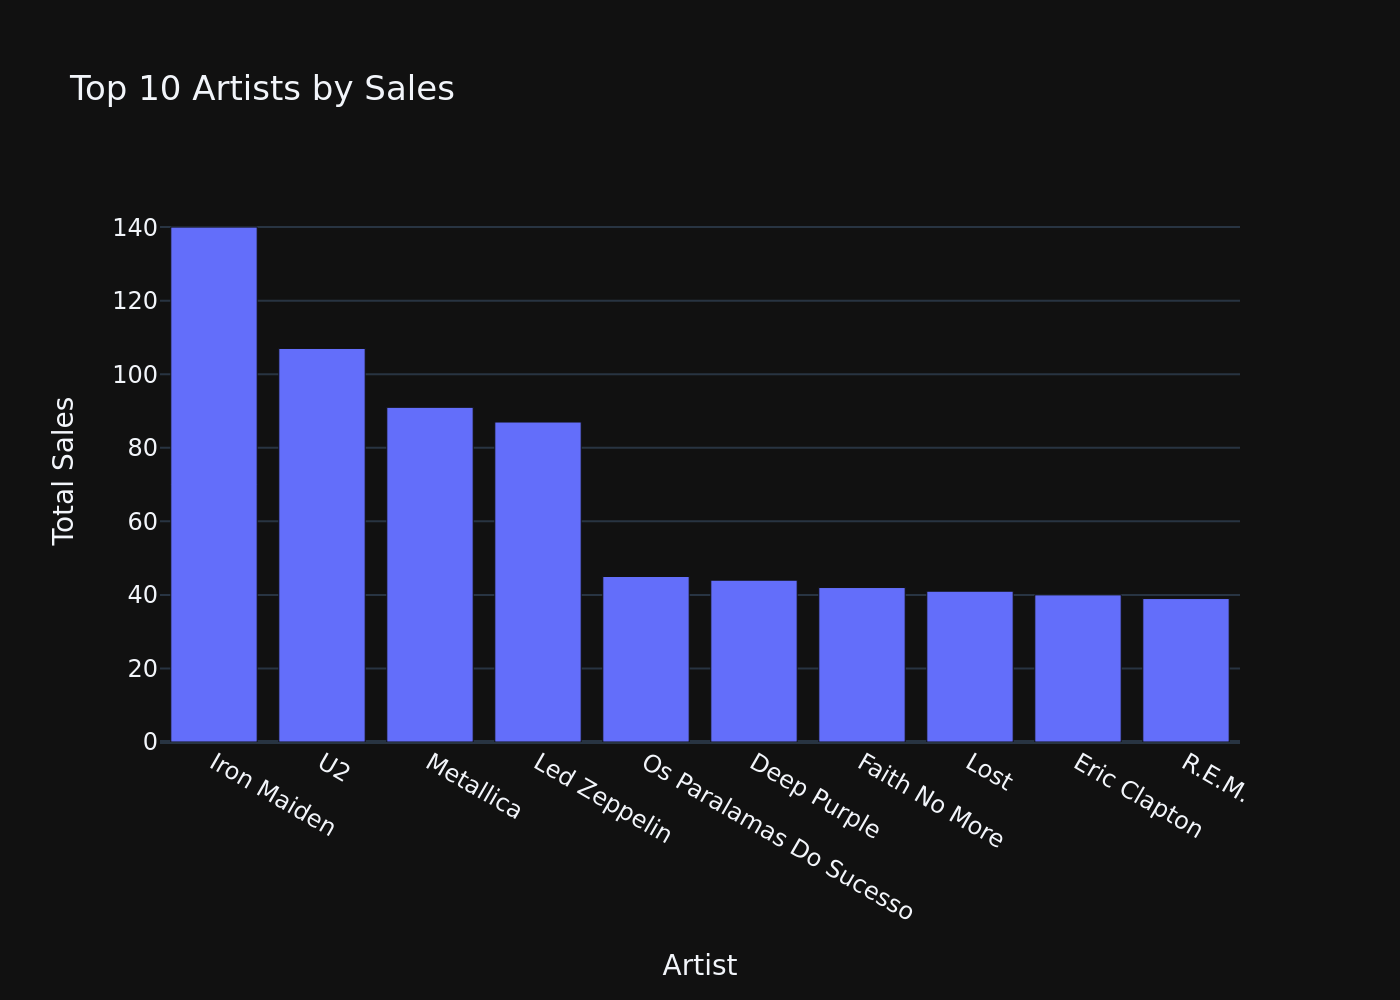

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


In [ ]:

vn = VannaDefault(model='chinook', api_key='317864f791404e428e7775b8c71526ae')
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')
vn.ask('What are the top 10 artists by sales?')

from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN Genre g ON t.GenreId = g.GenreId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
WHERE g.Name = 'Electronica/Dance'
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 5;
   ArtistId        Name  TotalSales
0        36     O Rappa           7
1        92  Jamiroquai           5


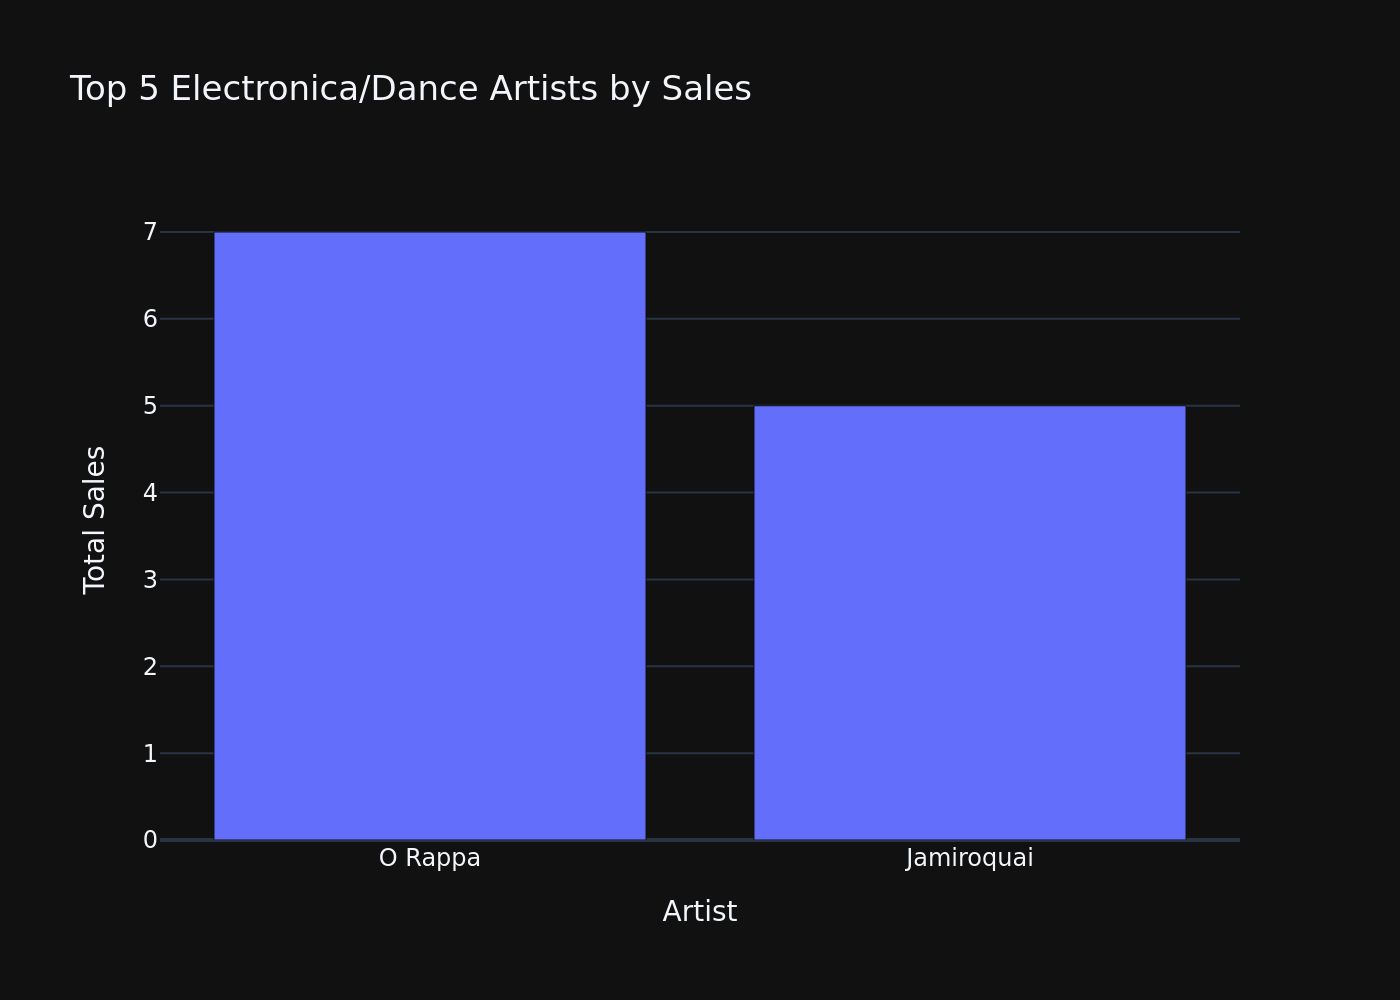

("SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales\nFROM Artist a\nJOIN Album al ON a.ArtistId = al.ArtistId\nJOIN Track t ON al.AlbumId = t.AlbumId\nJOIN Genre g ON t.GenreId = g.GenreId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nWHERE g.Name = 'Electronica/Dance'\nGROUP BY a.ArtistId, a.Name\nORDER BY TotalSales DESC\nLIMIT 5;",
    ArtistId        Name  TotalSales
 0        36     O Rappa           7
 1        92  Jamiroquai           5,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>TotalSales=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['O Rappa', 'Jamiroquai'], dtype=object),
               'xaxis': 'x',
      

In [6]:
vn.ask('What are the top 5 Electronica/Dance artists by sales?')


SELECT g.Name AS Genre, SUM(il.Quantity) AS TotalSales
FROM Genre g
JOIN Track t ON g.GenreId = t.GenreId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY g.Name
ORDER BY TotalSales DESC
LIMIT 10;
                Genre  TotalSales
0                Rock         835
1               Latin         386
2               Metal         264
3  Alternative & Punk         244
4                Jazz          80
5               Blues          61
6            TV Shows          47
7            R&B/Soul          41
8           Classical          41
9              Reggae          30


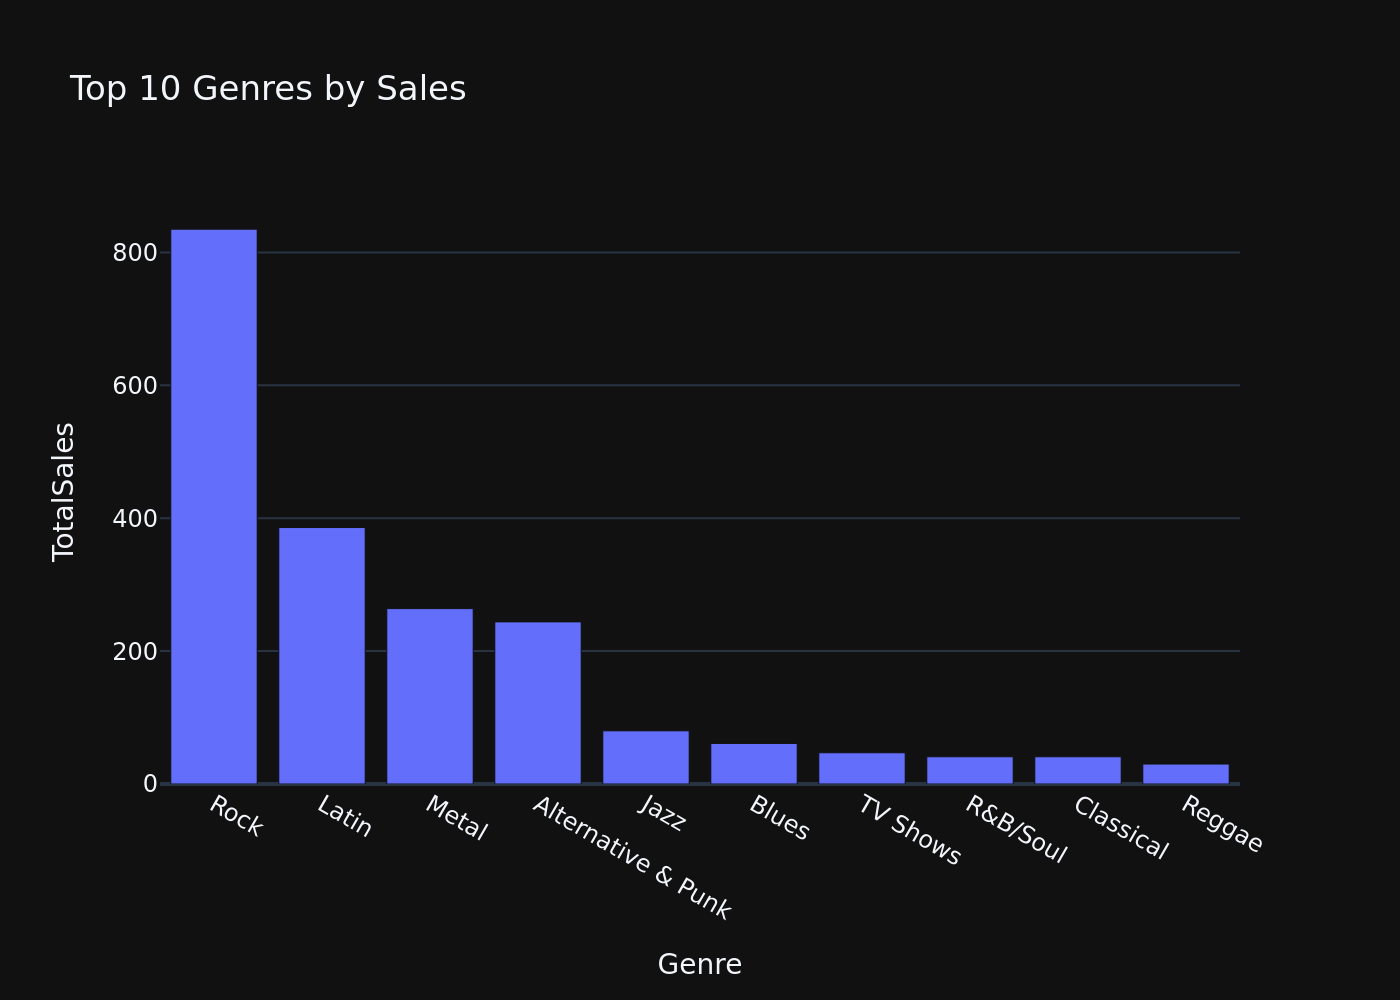

('SELECT g.Name AS Genre, SUM(il.Quantity) AS TotalSales\nFROM Genre g\nJOIN Track t ON g.GenreId = t.GenreId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY g.Name\nORDER BY TotalSales DESC\nLIMIT 10;',
                 Genre  TotalSales
 0                Rock         835
 1               Latin         386
 2               Metal         264
 3  Alternative & Punk         244
 4                Jazz          80
 5               Blues          61
 6            TV Shows          47
 7            R&B/Soul          41
 8           Classical          41
 9              Reggae          30,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Genre=%{x}<br>TotalSales=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 

In [7]:
vn.ask('list the  top 10 Genre  by sales?')

SELECT a.ArtistId, a.Name, COUNT(p.PlaylistId) AS PlaylistCount
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN PlaylistTrack pt ON t.TrackId = pt.TrackId
JOIN Playlist p ON pt.PlaylistId = p.PlaylistId
GROUP BY a.ArtistId, a.Name
ORDER BY PlaylistCount DESC
LIMIT 1;
   ArtistId         Name  PlaylistCount
0        90  Iron Maiden            516


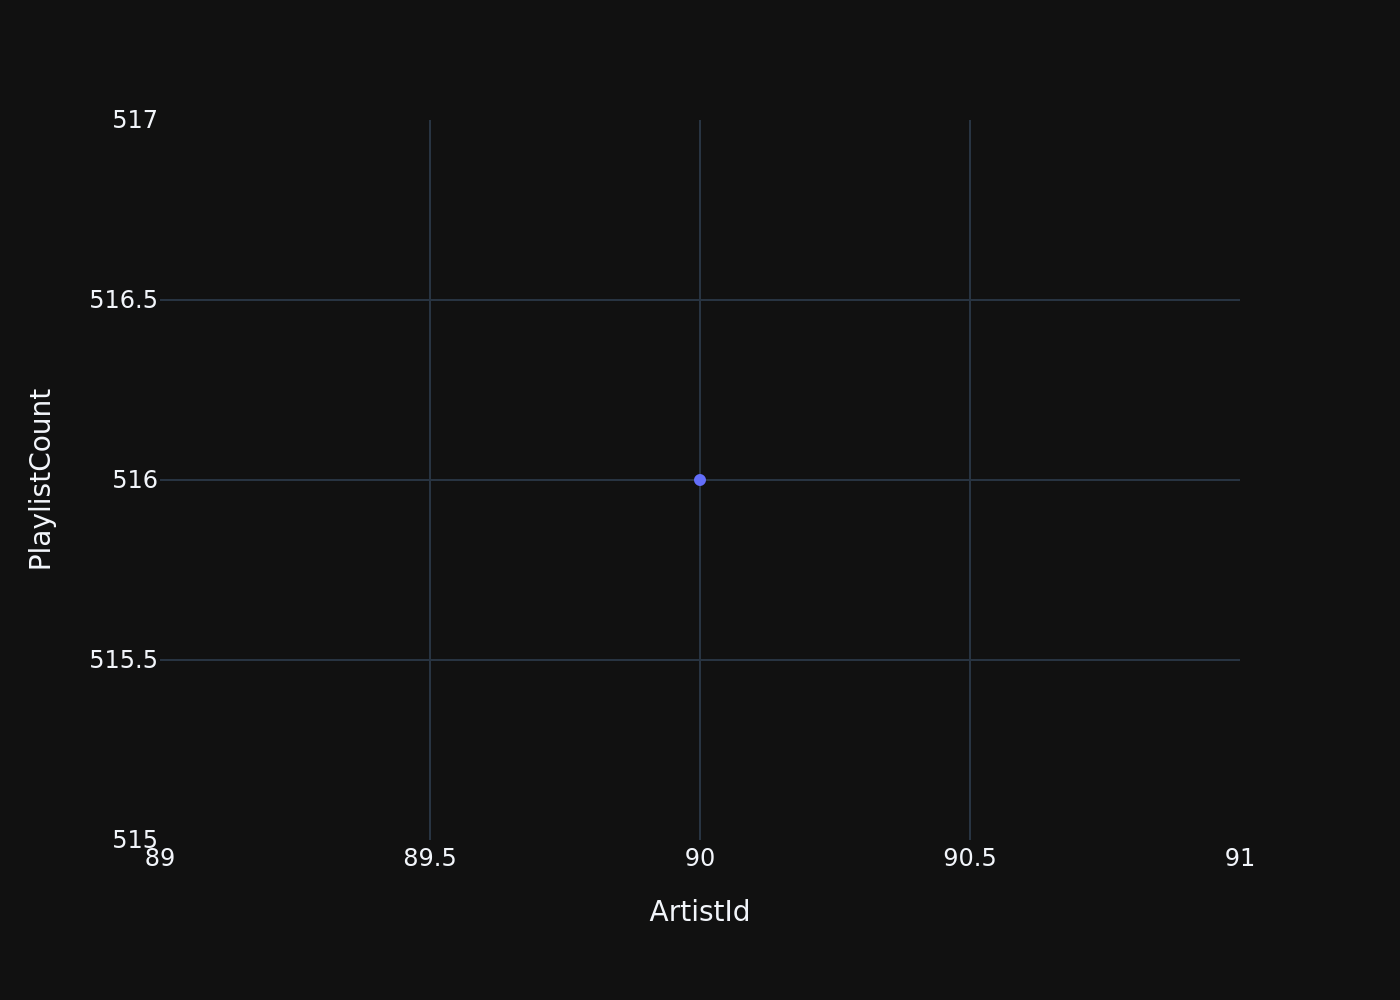

('SELECT a.ArtistId, a.Name, COUNT(p.PlaylistId) AS PlaylistCount\nFROM Artist a\nJOIN Album al ON a.ArtistId = al.ArtistId\nJOIN Track t ON al.AlbumId = t.AlbumId\nJOIN PlaylistTrack pt ON t.TrackId = pt.TrackId\nJOIN Playlist p ON pt.PlaylistId = p.PlaylistId\nGROUP BY a.ArtistId, a.Name\nORDER BY PlaylistCount DESC\nLIMIT 1;',
    ArtistId         Name  PlaylistCount
 0        90  Iron Maiden            516,
 Figure({
     'data': [{'hovertemplate': 'ArtistId=%{x}<br>PlaylistCount=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array([90]),
               'xaxis': 'x',
               'y': array([516]),
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
          

In [8]:
vn.ask('which artist appear most in the playlist?')

SELECT g.Name AS Genre, COUNT(t.TrackId) AS TotalTracks
FROM Genre g
LEFT JOIN Track t ON g.GenreId = t.GenreId
GROUP BY g.Name;
                 Genre  TotalTracks
0          Alternative           40
1   Alternative & Punk          332
2                Blues           81
3           Bossa Nova           15
4            Classical           74
5               Comedy           17
6                Drama           64
7       Easy Listening           24
8    Electronica/Dance           30
9          Heavy Metal           28
10         Hip Hop/Rap           35
11                Jazz          130
12               Latin          579
13               Metal          374
14               Opera            1
15                 Pop           48
16            R&B/Soul           61
17              Reggae           58
18                Rock         1297
19       Rock And Roll           12
20    Sci Fi & Fantasy           26
21     Science Fiction           13
22          Soundtrack           43
23     

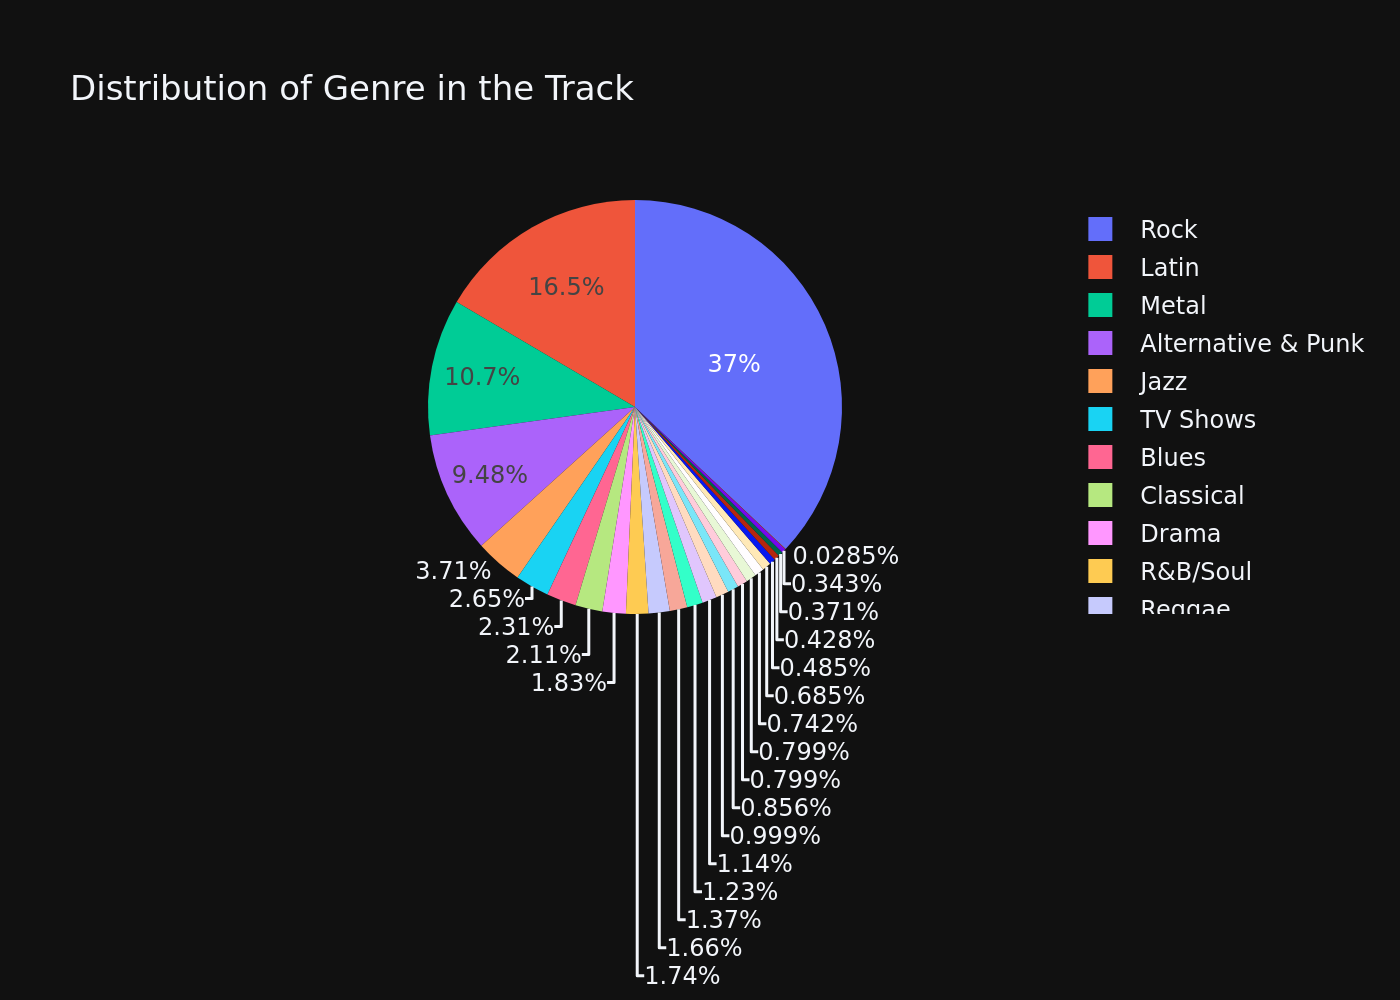

('SELECT g.Name AS Genre, COUNT(t.TrackId) AS TotalTracks\nFROM Genre g\nLEFT JOIN Track t ON g.GenreId = t.GenreId\nGROUP BY g.Name;',
                  Genre  TotalTracks
 0          Alternative           40
 1   Alternative & Punk          332
 2                Blues           81
 3           Bossa Nova           15
 4            Classical           74
 5               Comedy           17
 6                Drama           64
 7       Easy Listening           24
 8    Electronica/Dance           30
 9          Heavy Metal           28
 10         Hip Hop/Rap           35
 11                Jazz          130
 12               Latin          579
 13               Metal          374
 14               Opera            1
 15                 Pop           48
 16            R&B/Soul           61
 17              Reggae           58
 18                Rock         1297
 19       Rock And Roll           12
 20    Sci Fi & Fantasy           26
 21     Science Fiction           13
 22          

In [10]:
#select g.name, t.genreid, count (t.genreid) from track t 
#join genre g on g.Genreid=t.genreid group by t.genreid
 
vn.ask('What is the distribution of genre in the track ?')

## unfinished code

In [4]:
from vanna.remote import VannaDefault
vn2 = VannaDefault(model='dtt_gpt35', api_key='317864f791404e428e7775b8c71526ae')
vn2.connect_to_...() # Connect to your database here

from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

SyntaxError: invalid syntax (845136020.py, line 3)